# 2.Visual Data Analytics on Breast Cancer Wisconsin (Diagnostic) Data Set


In the developing world, cancer death is one of the major problems for humankind.One of the most common cancer types is breast cancer, and early diagnosis is the most important thing in its treatment.Accurate diagnosis is one of the most important processes in breast cancer treatment.

This dataset about breast cancer tumors from Dr. William H. Walberg of the University of Wisconsin Hospital were used for making predictions on breast tumor types.The dataset has **32 attributes and 569 observations**. Its target Y value is **diagnosis** which has two classes M = malignant(cancerous), B = benign(non-cancerous).

All parameters of the dataset can be useful to classify cancer; if these parameters have relatively large values, it can be a sign of malignant tissue

### Problem Statement: Imagine you are a ML engineer building a classification model on the dataset. You are visualizing the dataset to help understand the data better.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load dataset
dataset=pd.read_csv('./data.csv')
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
#Remove id from Dataset
dataset=dataset.drop('id',axis=1)
#print(dataset)
dataset.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [4]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
cancer = pp.ProfileReport(dataset)
cancer.to_file('Cancer.html')
display(IFrame('Cancer.html', width=900, height=350))

## 1a. Histogram (Univariate Analysis)
Univariate analysis the simplest form of data visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension).

One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage **histograms**.

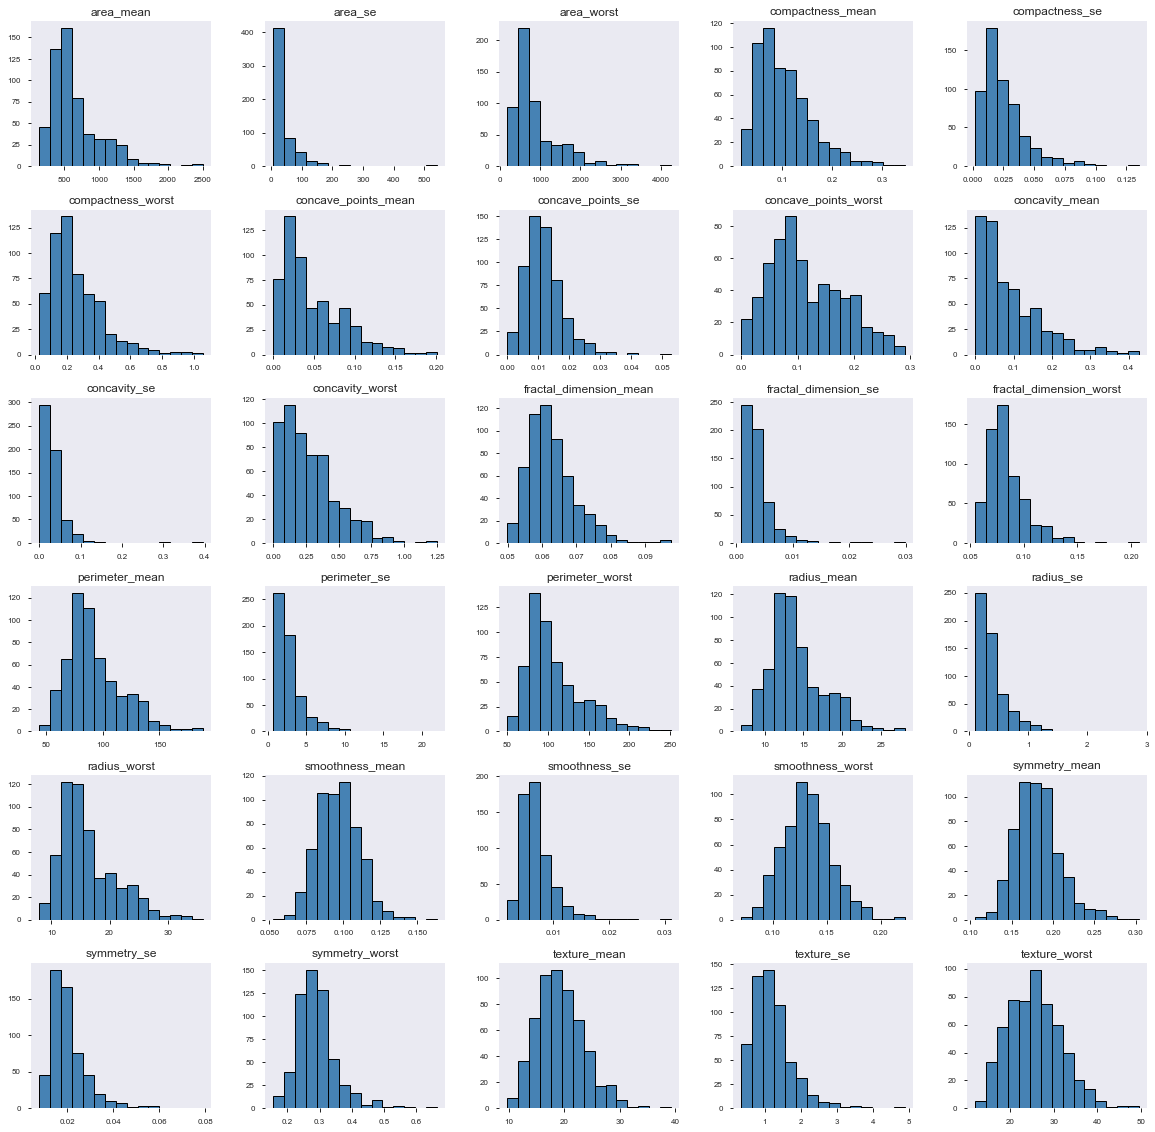

In [5]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.hist(ax=ax, bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)

plt.show()

The plots above give a good idea about the basic data distribution of  the attributes.The attributes **smoothness_worst**, **symmetry_mean**, and **texture_worst** show a Gaussian curve , whereas other attributes reflect a unimodal distribution. All these are useful analysis because then you can think of using an algorithm that works well with this kind of distribution.

## 1b.Histogram

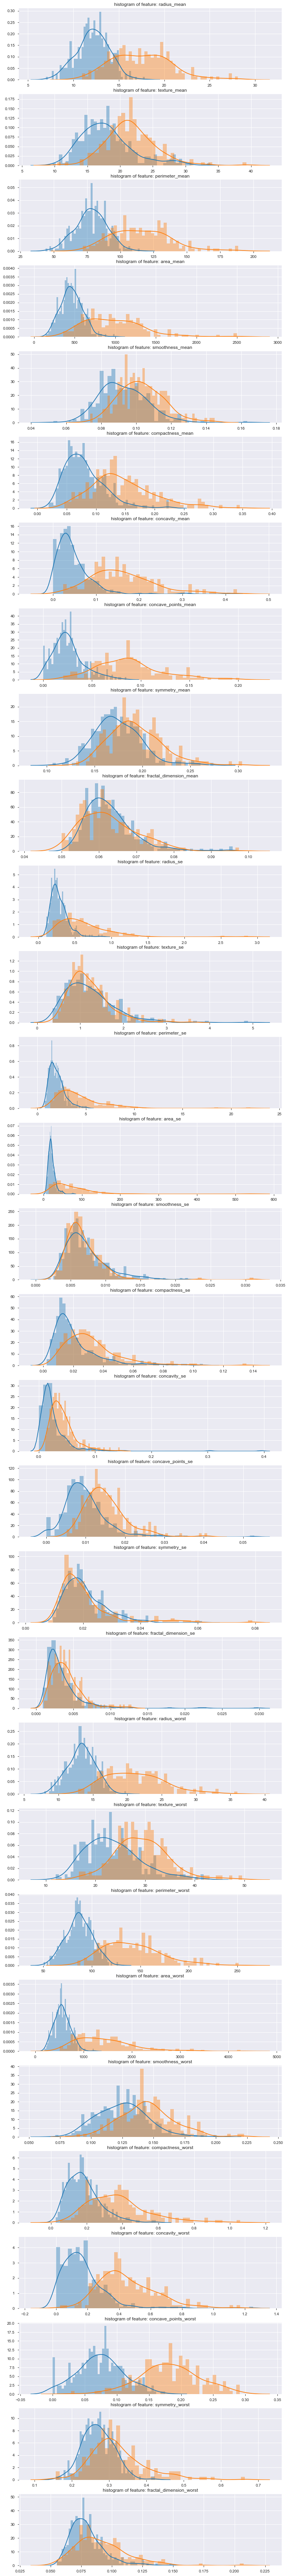

In [17]:
import matplotlib.gridspec as gridspec

#data1.csv is same as data.csv but with column id removed
df1 = pd.read_csv('data1.csv')

plt.figure(figsize=(12,30*4))
gs = gridspec.GridSpec(30, 1)
r_features = df1.columns[0:30]
for i, cn in enumerate(df1[r_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df1[cn][df1.diagnosis == "B"], bins=50)
    sns.distplot(df1[cn][dataset.diagnosis == "M"], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Here each attribute distribution indicated concerning tumor types.It describes the distribution of attributes.For instance, the shape of **radius_mean** attribute distribution for a **benign tumor** is symmetric, while the **area_se** attribute distribution for a **malignant tumor** is right-skewed. Attribute data values largely varied for some of the attributes.

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

More **reliable predictions** are made if the predictors and the target variable are normally distributed

## 2. Pie Chart

Class Split
B    357
M    212
Name: diagnosis, dtype: int64


Text(0, 0.5, 'Count')

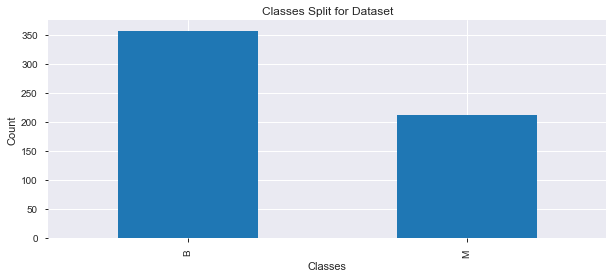

In [7]:
#Class Balance
print('Class Split')
print(dataset['diagnosis'].value_counts())
dataset['diagnosis'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [8]:
#Class Balance
import plotly.graph_objects as go

labels = ['Benign tumor','Malignant tumor']
values = [ 357, 212]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()
fig.write_html("label.html")

Understanding the number of observation in positive and negative class is important. This pie chart clearly shows a class imbalance problem. Fitting any model on this dataset will result in a biased result. To avoid this **SMOTE** has to be done.   

## 3. Heatmap(Multivariate Analysis)

In multivariate analysis multiple data dimensions or attributes (2 or more) are visualized. Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes.

### Visualizing data in Two Dimensions (2-D)

One of the best ways to check out potential correlations amongst the different data attributes is to leverage a pair-wise **correlation matrix** and depict it as a **heatmap**.

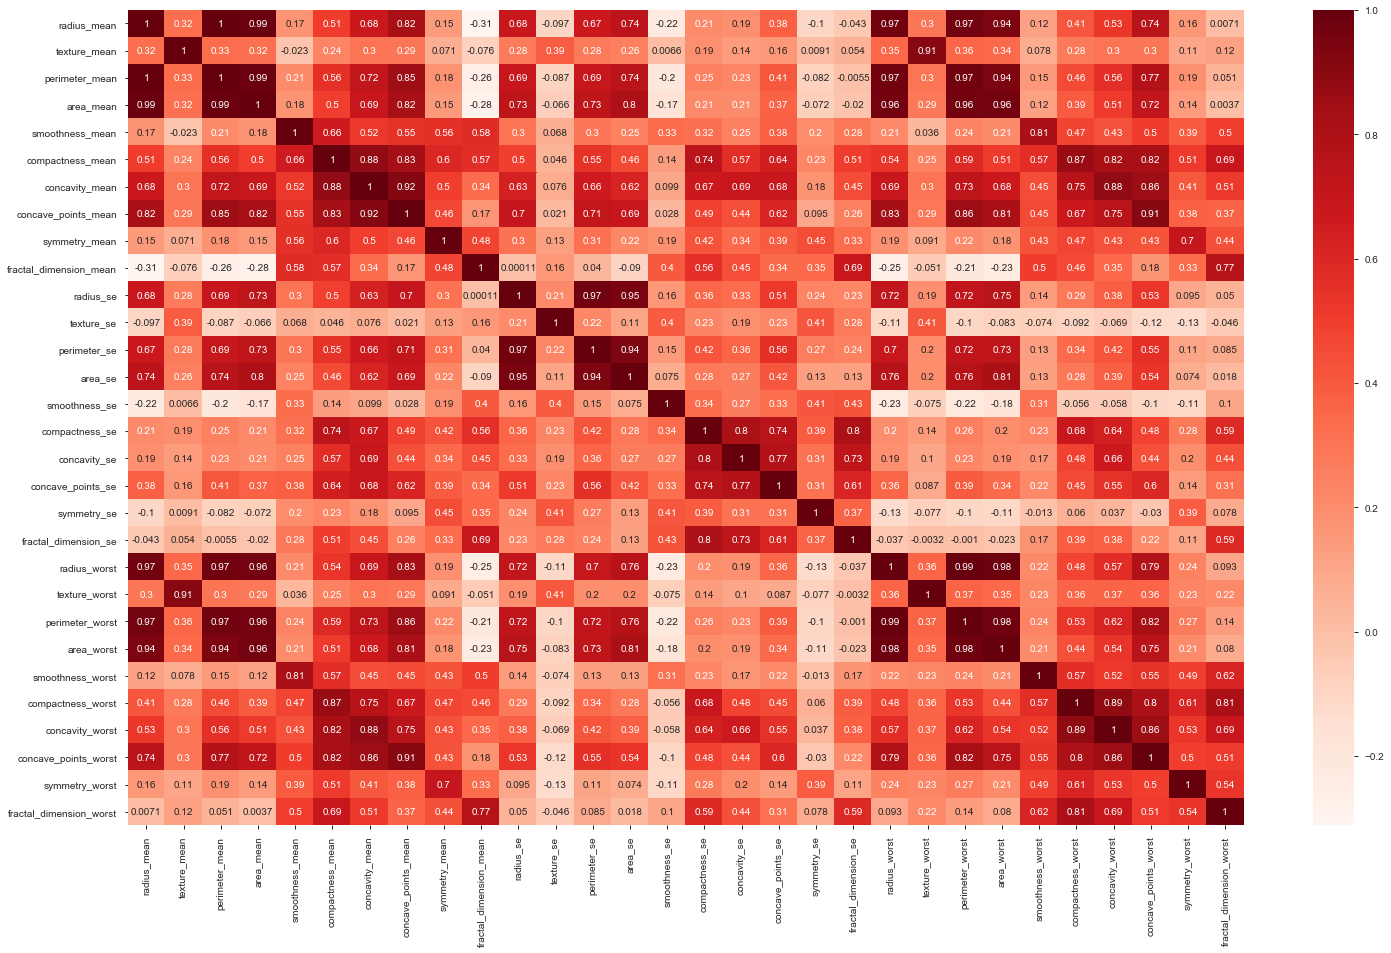

In [9]:
# Visualization of Correlations
fig = plt.figure(figsize=(25,15))
sns.heatmap(dataset.corr(),annot=True,cmap="Reds")

The gradients in the heatmap vary based on the strength of the correlation and you can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use **pair-wise scatter plots** amongst attributes of interest.


In [24]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('perimeter_mean', 'radius_mean'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('concavity_mean', 'compactness_mean'), ('concave_points_mean', 'radius_mean'), ('concave_points_mean', 'perimeter_mean'), ('concave_points_mean', 'area_mean'), ('concave_points_mean', 'compactness_mean'), ('concave_points_mean', 'concavity_mean'), ('perimeter_se', 'radius_se'), ('area_se', 'area_mean'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('concavity_se', 'compactness_se'), ('fractal_dimension_se', 'compactness_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('radius_worst', 'concave_points_mean'), ('texture_worst', 'texture_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'concave_points_mean'), ('perimeter_worst', 'radius_worst'), ('area_worst', 'radius_mean'), ('area_worst', 'perimeter_mean'), ('a

Correlated columns @ 0.8: [('perimeter_mean', 'radius_mean'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('concavity_mean', 'compactness_mean'), ('concave_points_mean', 'radius_mean'), ('concave_points_mean', 'perimeter_mean'), ('concave_points_mean', 'area_mean'), ('concave_points_mean', 'compactness_mean'), ('concave_points_mean', 'concavity_mean'), ('perimeter_se', 'radius_se'), ('area_se', 'area_mean'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('concavity_se', 'compactness_se'), ('fractal_dimension_se', 'compactness_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('radius_worst', 'concave_points_mean'), ('texture_worst', 'texture_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'concave_points_mean'), ('perimeter_worst', 'radius_worst'), ('area_worst', 'radius_mean'), ('area_worst', 'perimeter_mean'), ('area_worst', 'area_mean'), ('area_worst', 'concave_points_mean'), ('area_worst', 'area_se'), ('area_worst', 'radius_worst'), ('area_worst', 'perimeter_worst'), ('smoothness_worst', 'smoothness_mean'), ('compactness_worst', 'compactness_mean'), ('concavity_worst', 'compactness_mean'), ('concavity_worst', 'concavity_mean'), ('concavity_worst', 'compactness_worst'), ('concave points_worst', 'compactness_mean'), ('concave points_worst', 'concavity_mean'), ('concave points_worst', 'concave_points_mean'), ('concave points_worst', 'perimeter_worst'), ('concave points_worst', 'compactness_worst'), ('concave points_worst', 'concavity_worst'), ('fractal_dimension_worst', 'compactness_worst')]

## 4. Boxplot

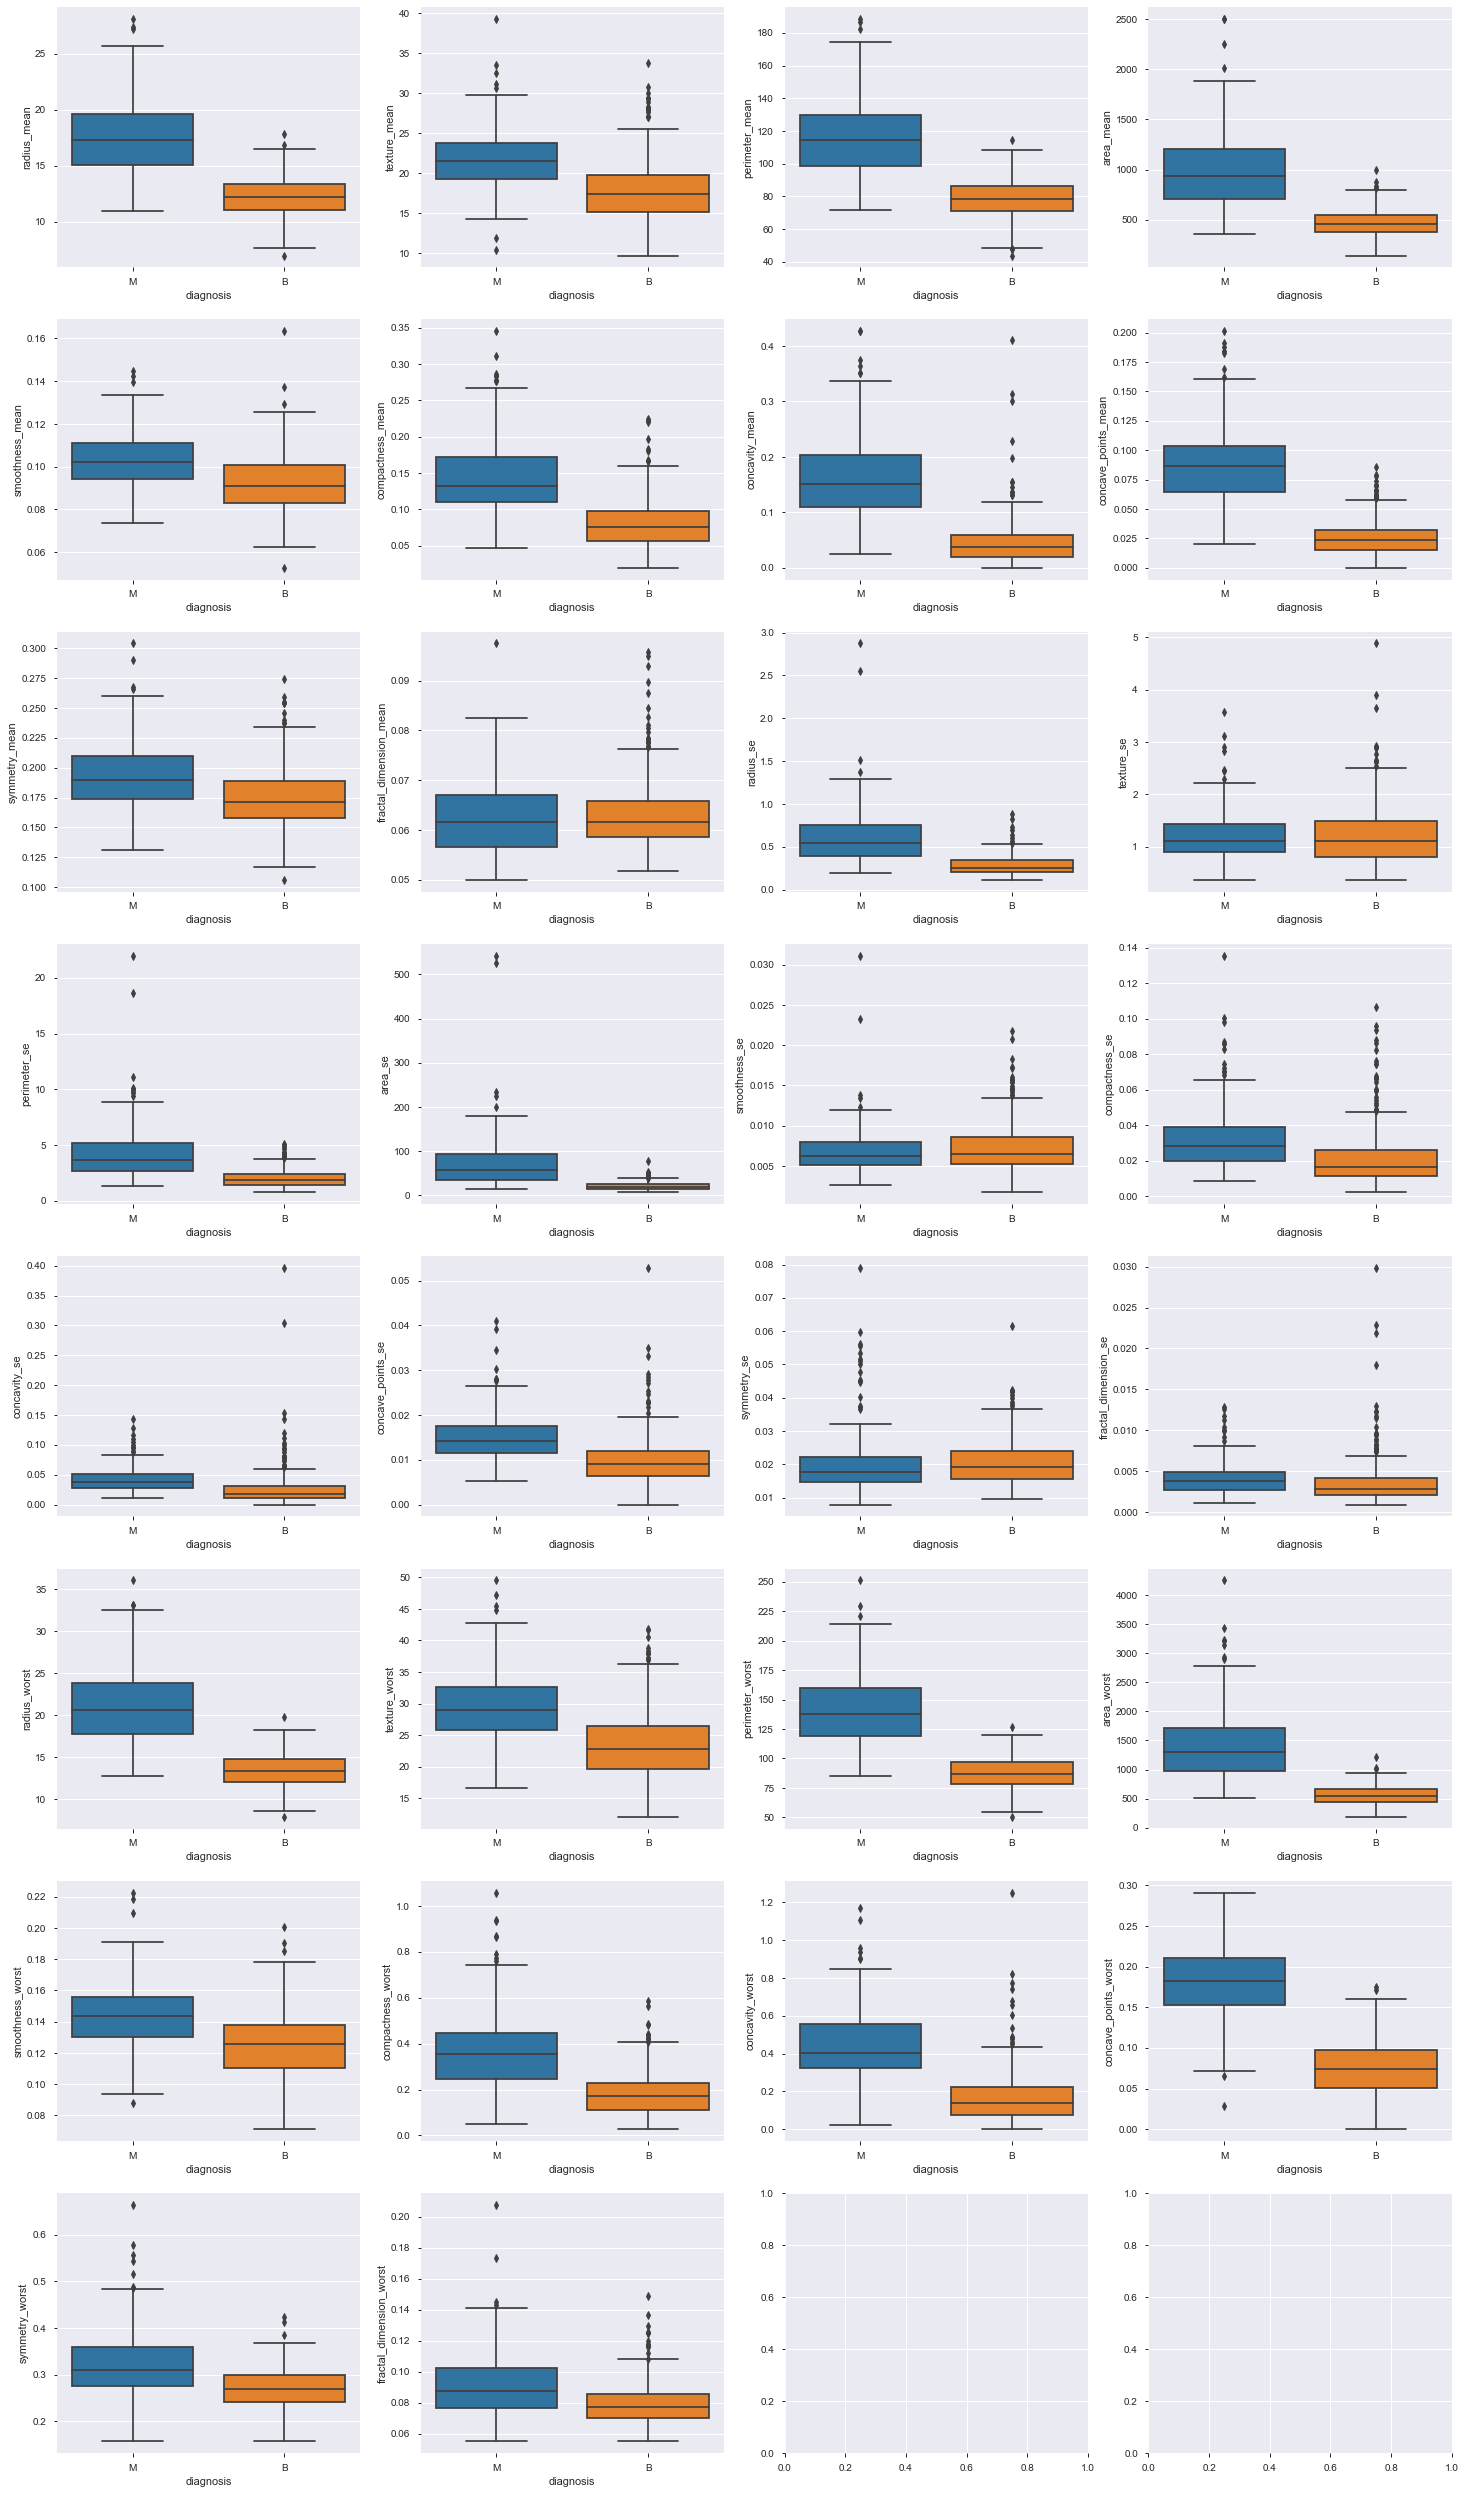

In [18]:
#Boxplot of Features

fig,ax=plt.subplots(nrows=8 ,ncols=4)

sns.boxplot(data=dataset,y='radius_mean',x='diagnosis',ax=ax[0,0])
sns.boxplot(data=dataset,y='texture_mean',x='diagnosis',ax=ax[0,1])
sns.boxplot(data=dataset,y='perimeter_mean',x='diagnosis',ax=ax[0,2])
sns.boxplot(data=dataset,y='area_mean',x='diagnosis',ax=ax[0,3])
sns.boxplot(data=dataset,y='smoothness_mean',x='diagnosis',ax=ax[1,0])
sns.boxplot(data=dataset,y='compactness_mean',x='diagnosis',ax=ax[1,1])
sns.boxplot(data=dataset,y='concavity_mean',x='diagnosis',ax=ax[1,2])
sns.boxplot(data=dataset,y='concave_points_mean',x='diagnosis',ax=ax[1,3])
sns.boxplot(data=dataset,y='symmetry_mean',x='diagnosis',ax=ax[2,0])
sns.boxplot(data=dataset,y='fractal_dimension_mean',x='diagnosis',ax=ax[2,1])
sns.boxplot(data=dataset,y='radius_se',x='diagnosis',ax=ax[2,2])
sns.boxplot(data=dataset,y='texture_se',x='diagnosis',ax=ax[2,3])
sns.boxplot(data=dataset,y='perimeter_se',x='diagnosis',ax=ax[3,0])
sns.boxplot(data=dataset,y='area_se',x='diagnosis',ax=ax[3,1])
sns.boxplot(data=dataset,y='smoothness_se',x='diagnosis',ax=ax[3,2])
sns.boxplot(data=dataset,y='compactness_se',x='diagnosis',ax=ax[3,3])
sns.boxplot(data=dataset,y='concavity_se',x='diagnosis',ax=ax[4,0])
sns.boxplot(data=dataset,y='concave_points_se',x='diagnosis',ax=ax[4,1])
sns.boxplot(data=dataset,y='symmetry_se',x='diagnosis',ax=ax[4,2])
sns.boxplot(data=dataset,y='fractal_dimension_se',x='diagnosis',ax=ax[4,3])
sns.boxplot(data=dataset,y='radius_worst',x='diagnosis',ax=ax[5,0])
sns.boxplot(data=dataset,y='texture_worst',x='diagnosis',ax=ax[5,1])
sns.boxplot(data=dataset,y='perimeter_worst',x='diagnosis',ax=ax[5,2])
sns.boxplot(data=dataset,y='area_worst',x='diagnosis',ax=ax[5,3])
sns.boxplot(data=dataset,y='smoothness_worst',x='diagnosis',ax=ax[6,0])
sns.boxplot(data=dataset,y='compactness_worst',x='diagnosis',ax=ax[6,1])
sns.boxplot(data=dataset,y='concavity_worst',x='diagnosis',ax=ax[6,2])
sns.boxplot(data=dataset,y='concave_points_worst',x='diagnosis',ax=ax[6,3])
sns.boxplot(data=dataset,y='symmetry_worst',x='diagnosis',ax=ax[7,0])
sns.boxplot(data=dataset,y='fractal_dimension_worst',x='diagnosis',ax=ax[7,1])

fig.set_figwidth(25)
fig.set_figheight(45)

According to the boxplots, some features can be excluded since there were too many **outliers** according to this boxplot.

## 5.Parallel coordinates

Another way of visualizing multivariate data for multiple attributes together is to use parallel coordinates.Visualized using **plotly**.

In [19]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('data1.csv')

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df1['diagnosis'] = labelencoder.fit_transform(df1['diagnosis'])


fig = px.parallel_coordinates(df1, color="diagnosis", labels={"diagnosis": "Diagnosis","radius_mean": "Radius Mean", "texture_mean": "Texture Mean", "perimeter_mean":"Perimeter_Mean", " area_mean": "Area Mean","smoothness_mean": "Smoothness Mean", "compactness_mean":"Compactness Mean", "concavity_mean": "Concavity Mean","concave_points_mean":"Concave points mean","symmetry_mean":"Symmetry Mean","fractal_dimension_mean": "Fractal dimension mean","radius_se":"Radius_se","texture_se":"Texture_se","perimeter_se":"Perimeter_se","area_se":"Area_se","smoothness_se":"Smoothness_se","compactness_se":"Compactness_se","concavity_se":"Concavity_se","concave points_se":"Concave points_se","symmetry_se":"Symmetry_se","fractal_dimension_se":"Fractal_dimension_se","radius_worst":"Radius_worst","texture_worst":"Texture_worst","perimeter_worst":"Perimeter_worst","area_worst":"Area_worst","smoothness_worst":"Smoothness_worst","compactness_worst":"Compactness_worst","concavity_worst":"Concavity_worst","concave points_worst":"Concave points_worst","symmetry_worst":"Symmetry_worst","fractal_dimension_worst":"Fractal_dimension_worst"},color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
fig.show()
fig.write_html("parallel.html")